In [3]:
import tensorflow as tf
print(tf.__version__)



1.15.0


In [4]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 102kB/s 
     |████████████████████████████████| 3.8MB 34.7MB/s 
     |████████████████████████████████| 450kB 50.1MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization


Using TensorFlow backend.


In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
xtrain.shape

(60000, 28, 28)

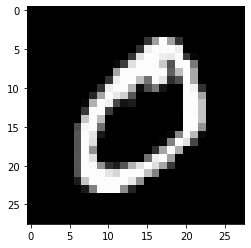

In [6]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [7]:
ytrain[1]

0

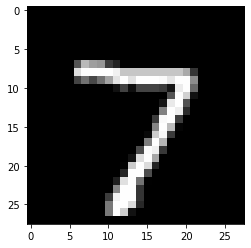

In [8]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [9]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [10]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [0]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [12]:
x_test.shape

(10000, 784)

In [0]:
x_train/=255
x_test/=255

In [0]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [0]:
# Initialize the constructor

model = Sequential()

# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
epochs = 20
batch_size = 512


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 93us/sample - loss: 0.3655 - accuracy: 0.8973 - val_loss: 0.1400 - val_accuracy: 0.9610
Epoch 2/20
54000/54000 [==============================] - 4s 81us/sample - loss: 0.1323 - accuracy: 0.9614 - val_loss: 0.1000 - val_accuracy: 0.9722
Epoch 3/20
54000/54000 [==============================] - 4s 80us/sample - loss: 0.0830 - accuracy: 0.9758 - val_loss: 0.0829 - val_accuracy: 0.9758
Epoch 4/20
54000/54000 [==============================] - 4s 80us/sample - loss: 0.0590 - accuracy: 0.9828 - val_loss: 0.0783 - val_accuracy: 0.9782
Epoch 5/20
54000/54000 [==============================] - 4s 81us/sample - loss: 0.0403 - accuracy: 0.9882 - val_loss: 0.0697 - val_accuracy: 0.9800
Epoch 6/20
54000/54000 [==============================] - 4s 81us/sample - loss: 0.0303 - accuracy: 0.9915 - val_loss: 0.0675 - val_accuracy: 0.9810
Epoch 7/20
54000/54000 [==============================] -

[0.961, 0.97216666, 0.97583336, 0.97816664, 0.98, 0.981, 0.98183334, 0.9831667, 0.98466665, 0.9825, 0.9816667, 0.9845, 0.9841667, 0.9841667, 0.984, 0.98483336, 0.98466665, 0.98483336, 0.9853333, 0.98516667]
[0.8972778, 0.96137035, 0.9757963, 0.98275924, 0.9881667, 0.9915185, 0.99424076, 0.9960926, 0.99766666, 0.9978704, 0.9987037, 0.9994444, 0.99972224, 0.9999259, 0.999963, 1.0, 1.0, 1.0, 0.99998146, 1.0]


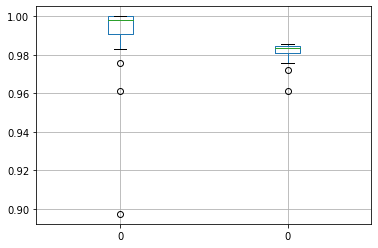

In [18]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [19]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.983
Loss: 0.070


In [0]:
y_predict = model.predict(x_test)

In [21]:
y_predict[0]

array([1.0942471e-09, 3.2371308e-10, 3.3302928e-08, 1.3669306e-06,
       4.2217969e-14, 8.3313434e-10, 8.1954440e-16, 9.9999845e-01,
       1.8169790e-09, 1.7910403e-07], dtype=float32)

In [22]:
np.argmax(y_predict[0])

7

In [23]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 971    1    1    0    1    1    2    1    2    0]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   2    1 1014    0    1    0    2    6    6    0]
 [   0    0    3  990    0    4    0    4    4    5]
 [   1    0    3    0  963    0    3    2    1    9]
 [   2    0    0    5    1  875    3    1    3    2]
 [   2    3    1    1    2    3  945    0    1    0]
 [   1    3    5    2    1    0    0 1010    3    3]
 [   2    0    4    4    4    3    2    2  949    4]
 [   3    2    0    3    5    2    0    3    3  988]]


In [24]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

